In [1]:
import csv
from urllib.parse import unquote
from helpers import *
import networkx as nx

# Function to create the dictionary from a TSV file
def create_dictionary_from_tsv(file_path):
    data_dict = {}
    G = nx.DiGraph()
    with open(file_path, 'r', newline='', encoding='utf-8') as tsvfile:
        reader = csv.reader(tsvfile, delimiter='\t')
        
        all_articles = []
        for row in reader:
            if len(row) == 2:
                article, subjects = row
                subjects_list = subjects.split('.')
                for i in range(len(subjects_list)-1):
                    G.add_edge(unquote(subjects_list[i]), unquote(subjects_list[i+1]))
                

                article = unquote(article)
                all_articles.append(article)

                data_dict[article] = {
                    'main_subject': unquote(subjects_list[1]) if len(subjects_list) >= 2 else None,
                    'secondary_subject': unquote(subjects_list[2]) if len(subjects_list) >= 3 else None,
                    'tertiary_subject': unquote(subjects_list[3]) if len(subjects_list) >= 4 else None
                }
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return data_dict, all_articles, G

# Example usage
result_dict, all_articles, graph_cat = create_dictionary_from_tsv("dataset/wikispeedia_paths-and-graph/categories.tsv")

# Print the result dictionary
for article, subjects in result_dict.items():
    print(f"Article: {article}")
    print(f"Main Subject: {subjects['main_subject']}")
    print(f"Secondary Subject: {subjects['secondary_subject']}")
    print(f"Tertiary Subject: {subjects['tertiary_subject']}")
    print("\n")


Article: Áedán_mac_Gabráin
Main Subject: People
Secondary Subject: Historical_figures
Tertiary Subject: None


Article: Åland
Main Subject: Geography
Secondary Subject: European_Geography
Tertiary Subject: European_Countries


Article: Édouard_Manet
Main Subject: People
Secondary Subject: Artists
Tertiary Subject: None


Article: Éire
Main Subject: Geography
Secondary Subject: European_Geography
Tertiary Subject: European_Countries


Article: Óengus_I_of_the_Picts
Main Subject: People
Secondary Subject: Historical_figures
Tertiary Subject: None


Article: €2_commemorative_coins
Main Subject: Business_Studies
Secondary Subject: Currency
Tertiary Subject: None


Article: 10th_century
Main Subject: History
Secondary Subject: General_history
Tertiary Subject: None


Article: 11th_century
Main Subject: History
Secondary Subject: General_history
Tertiary Subject: None


Article: 12th_century
Main Subject: History
Secondary Subject: General_history
Tertiary Subject: None


Article: 13th_centu

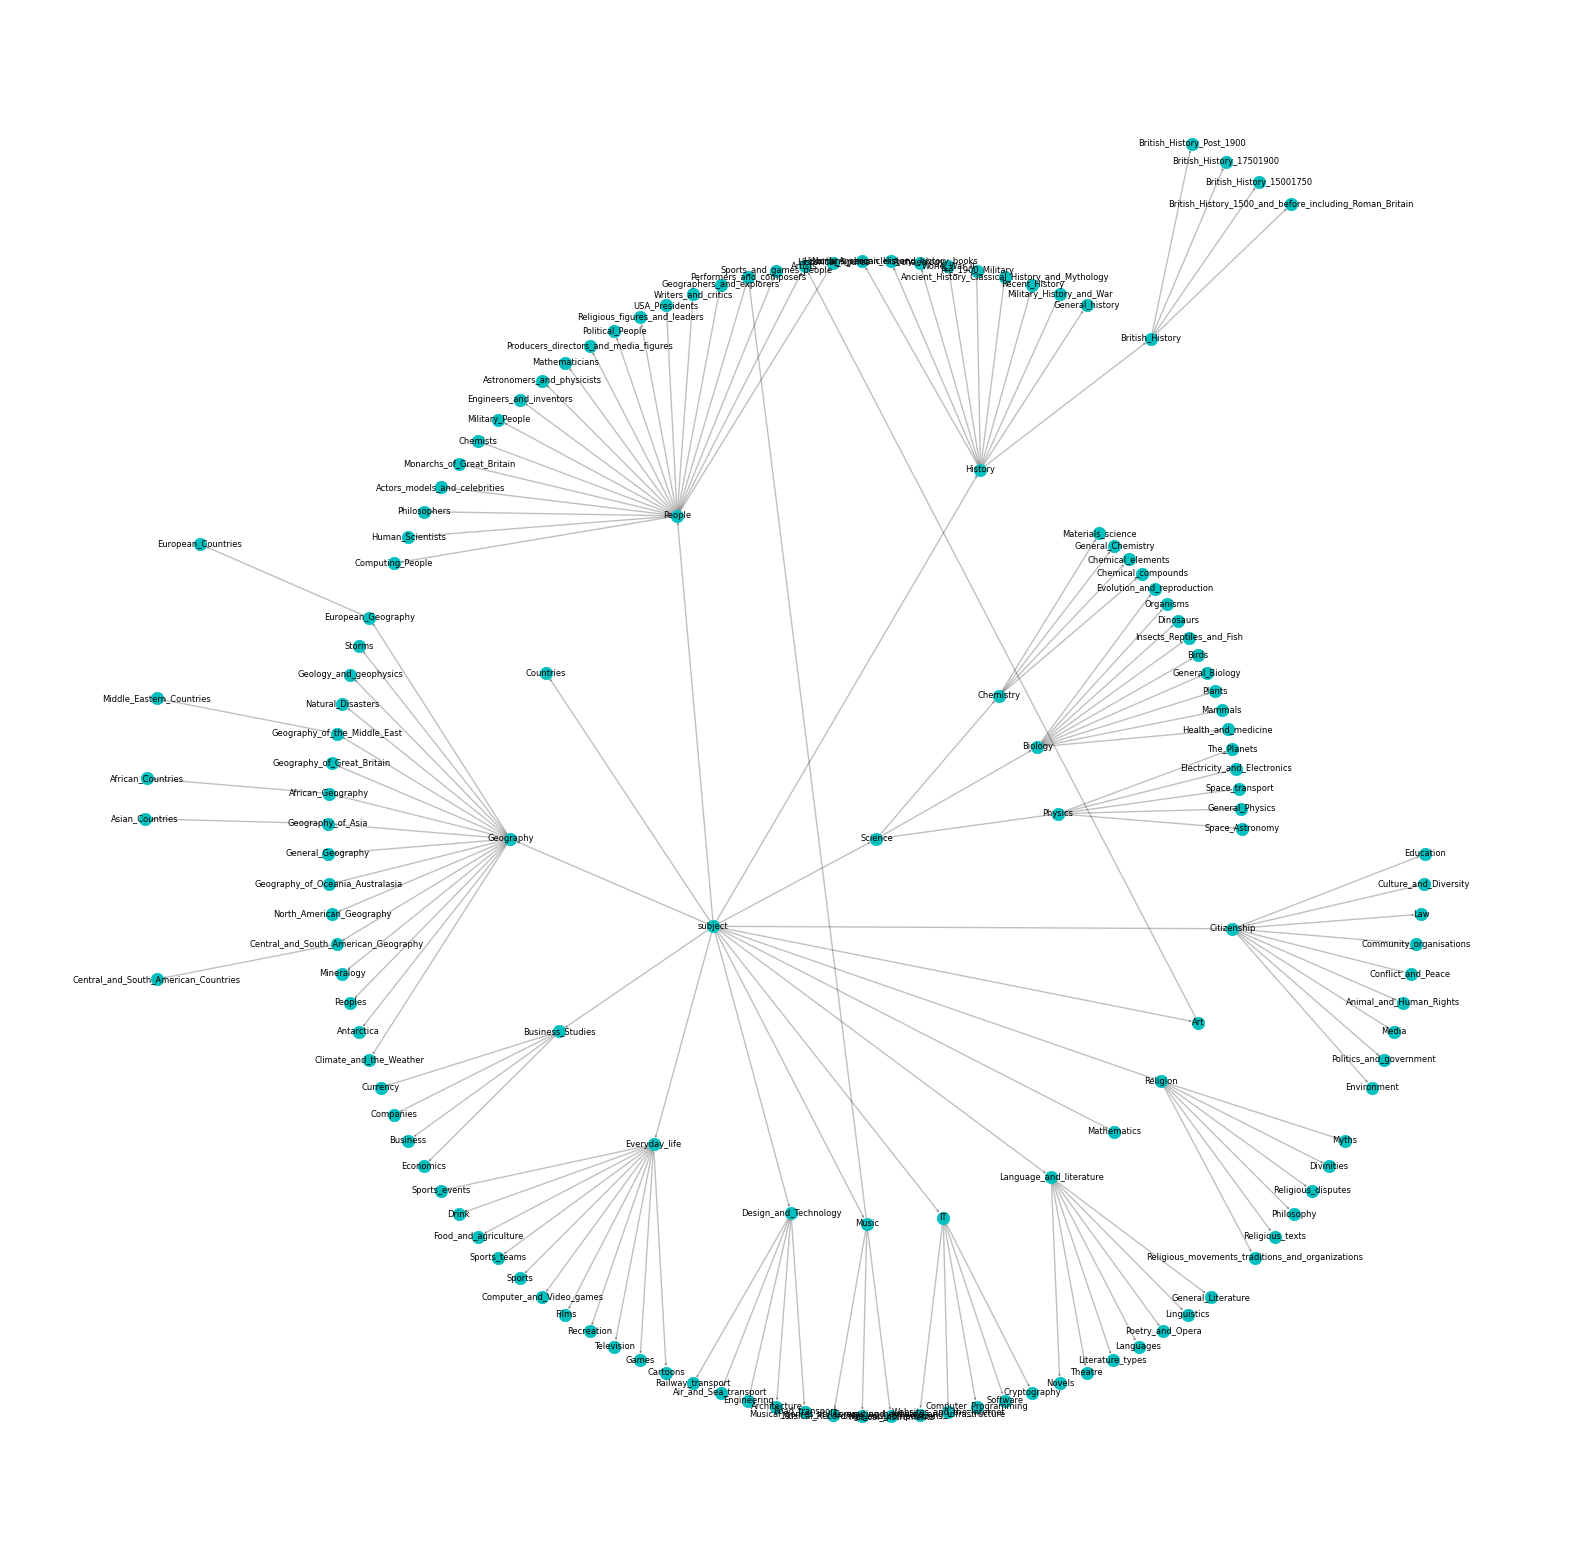

In [5]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(20, 20))
pos = nx.nx_agraph.graphviz_layout(graph_cat, prog="twopi", args="")
edge_colors = [(0, 0, 0, 0.25) for _ in graph_cat.edges()]
nx.draw(graph_cat, pos, ax=ax, with_labels=True, cmap=plt.cm.Reds, node_color="c", node_size=80, font_size=6, font_color= "black",linewidths = 0.5, arrowsize=2, edge_color= edge_colors)

In [22]:
dfs = preprocessing()
print(len(dfs["categories"]))

5204


In [23]:
duplicate_values = dfs["categories"]["article"].duplicated()
len(dfs["categories"].loc[duplicate_values, "article"].values)

606

In [24]:
print(len(result_dict))

4598


In [26]:
print(dfs["categories"].loc[duplicate_values, "article"].values)


['Áedán_mac_Gabráin' 'Åland' 'Éire' 'Óengus_I_of_the_Picts' 'Abacus'
 'Abbey' 'Abbot' 'Abkhazia' 'Abu_Dhabi' 'Acid_rain' 'Acorn_Computers'
 'Adam_Smith' 'Advertising' 'Afghanistan' 'Akhenaten' 'Al_Jazeera'
 'Albania' 'Albigensian_Crusade' 'Alcibiades' 'Alfred_the_Great'
 'Alfred_the_Great' 'Algeria' 'Almond' 'Andorra' 'Anglo-Saxon_literature'
 'Angola' 'Anguilla' 'Animation' 'Anne_of_Great_Britain' 'Anschluss'
 'Antigua_and_Barbuda' 'Aquarium' 'Argentina' 'Armenia' 'Arthur_Sullivan'
 'Arthur_Wellesley,_1st_Duke_of_Wellington' 'Aruba' 'Athanasius_Kircher'
 'Attila_the_Hun' 'Augusta,_Lady_Gregory' 'Australia' 'Austria' 'Avocado'
 'Avro_Lancaster' 'Azerbaijan' 'BBC' 'Babur' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Barley' 'Basil' 'Bean' 'Bede' 'Beekeeping'
 'Beet' 'Belarus' 'Belgium' 'Belize' 'Ben_Jonson' 'Benin'
 'Benito_Mussolini' 'Benjamin_Britten'
 'Benjamin_Disraeli,_1st_Earl_of_Beaconsfield' 'Benjamin_Franklin'
 'Benjamin_of_Tudela' 'Bermuda' 'Bhutan' 'Biodiesel' 'Biodiversity'

In [28]:
dfs["categories"].loc[dfs["categories"]["article"] == "Benjamin_of_Tudela", :].head()

,article,category
624,Benjamin_of_Tudela,subject.History.Ancient_History_Classical_Hist...
625,Benjamin_of_Tudela,subject.History.Historians_chroniclers_and_his...


In [44]:
dfs["categories"].loc[dfs["categories"]["article"] == "Winston_Churchill", :].head()

,article,category
5106,Winston_Churchill,subject.History.British_History.British_Histor...
5107,Winston_Churchill,subject.People.Political_People


In [42]:
result_dict["Alfred_the_Great"]

{'main_subject': 'People',
 'secondary_subject': 'Monarchs_of_Great_Britain',
 'tertiary_subject': None}

In [18]:
print(len(result_dict))
print(len(all_articles))

4598
5204


In [19]:
set_ = set(all_articles)
print(len(set_))

4598


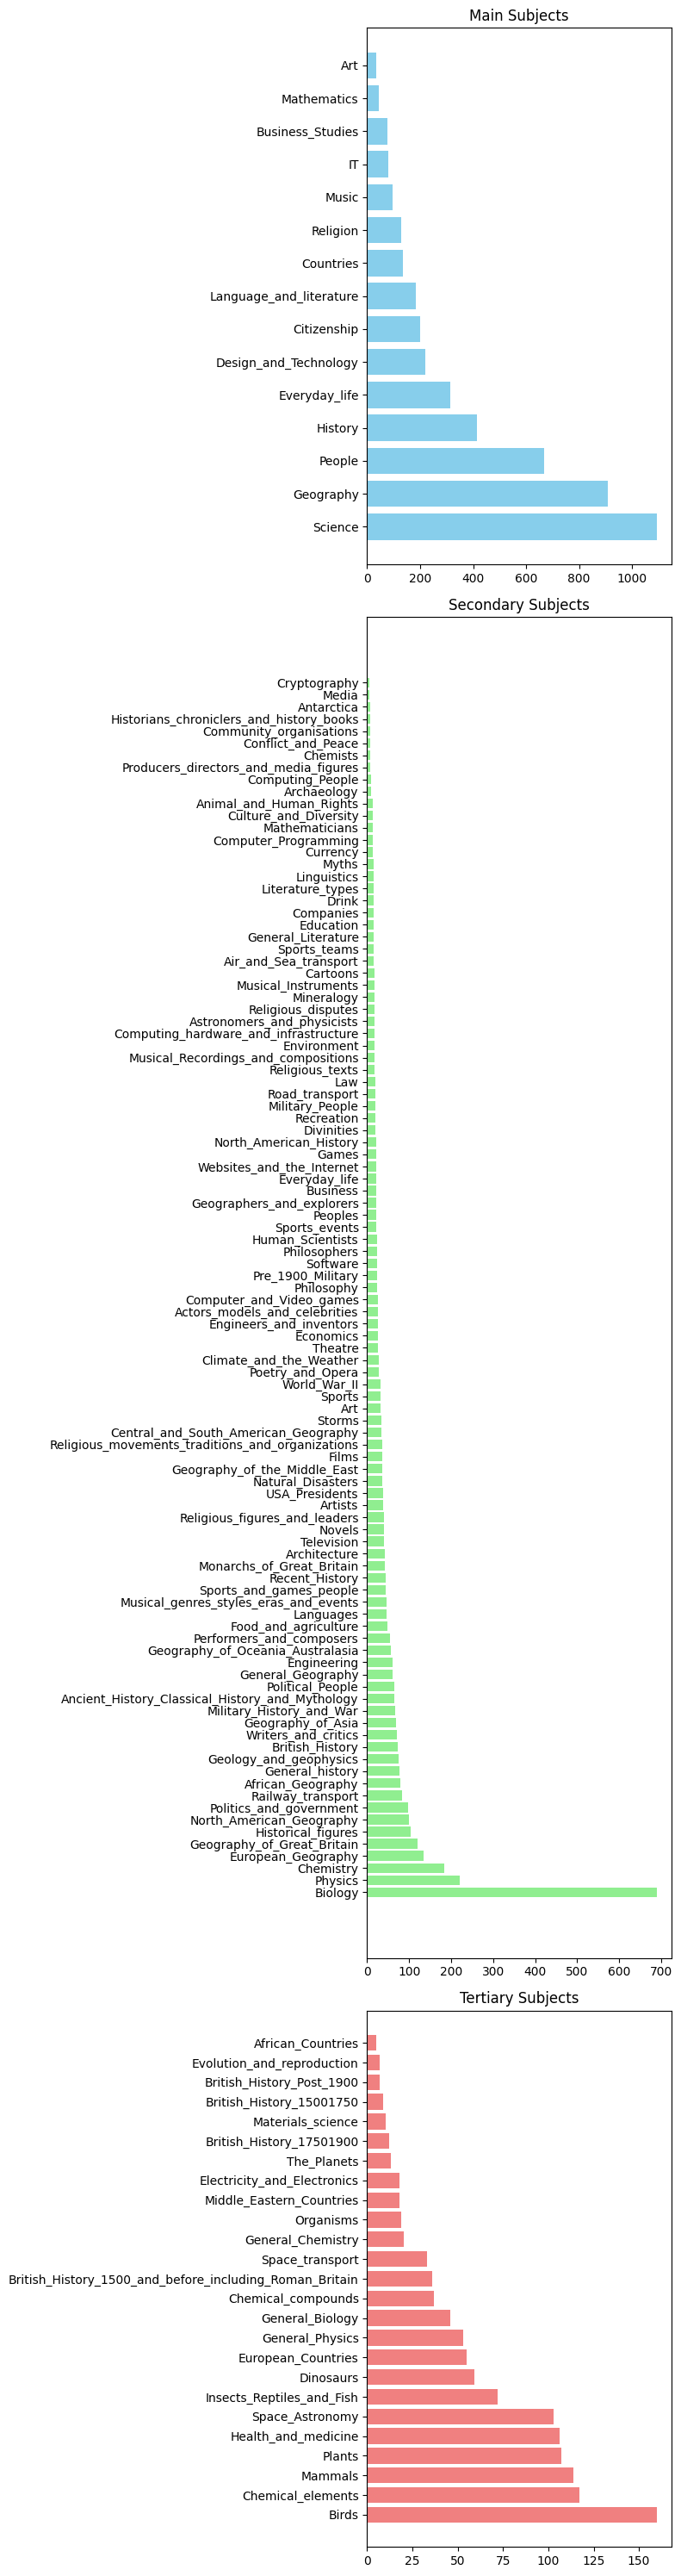

In [39]:
import matplotlib.pyplot as plt
from collections import Counter

main_subjects = [entry.get('main_subject') for entry in result_dict.values()]
secondary_subjects = [entry.get('secondary_subject') for entry in result_dict.values()]
tertiary_subjects = [entry.get('tertiary_subject') for entry in result_dict.values()]

# Create horizontal bar charts for each subject
fig, ax = plt.subplots(3, 1, figsize=(8, 30), gridspec_kw={'height_ratios': [1, 2.5, 1]})

def create_horizontal_bar_chart(ax, subjects, title, color):
    subjects = [subject for subject in subjects if subject is not None]
    counts = Counter(subjects)
    sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
    ax.barh(list(sorted_counts.keys()), list(sorted_counts.values()), color=color)
    ax.set_title(title)

create_horizontal_bar_chart(ax[0], main_subjects, 'Main Subjects', 'skyblue')
create_horizontal_bar_chart(ax[1], secondary_subjects, 'Secondary Subjects', 'lightgreen')
create_horizontal_bar_chart(ax[2], tertiary_subjects, 'Tertiary Subjects', 'lightcoral')

plt.tight_layout()
plt.show()
